# 01 Importing Libraries, Data & Merging Dataframes

## 01.1 Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Disabling depreciation warnings
warnings.filterwarnings("ignore")

# Choosing styling option for how plots will appear
plt.style.use('fivethirtyeight')

## 01.2 Importing Data 

In [2]:
# Configure API key

quandl.ApiConfig.api_key = '-4gZi2gNw7SCGDGhtsGp'

In [3]:
# Importing "Zillow Real State Data - Data"

data = quandl.get_table('ZILLOW/DATA')

In [4]:
# Verify 'data'

data.head()

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2022-07-31,577097.0
1,ZSFH,99999,2022-06-30,580792.0
2,ZSFH,99999,2022-05-31,581718.0
3,ZSFH,99999,2022-04-30,580347.0
4,ZSFH,99999,2022-03-31,579785.0


In [5]:
data.shape

(10000, 4)

In [6]:
# Importing "Zillow Real State Data - Indicators"

indicators = quandl.get_table('ZILLOW/INDICATORS')

In [7]:
# Verify 'indicators'

indicators.head()

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [8]:
indicators.shape

(56, 3)

In [9]:
# Importing "Zillow Real State Data - Regions"

regions = quandl.get_table('ZILLOW/REGIONS')

In [10]:
# Verify 'regions'

regions.head()

,region_id,region_type,region
None,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo


In [11]:
regions.shape

(10000, 3)

## 01.3 Merging Data Frames

In [12]:
# Merge 'data' dataframe with 'regions' dataframe

data_region = data.merge(regions, on = ['region_id'])

In [13]:
# Verify 'data_region'

data_region.head()

,indicator_id,region_id,date,value,region_type,region
0,ZSFH,99999,2022-07-31,577097.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,ZSFH,99999,2022-06-30,580792.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin
2,ZSFH,99999,2022-05-31,581718.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin
3,ZSFH,99999,2022-04-30,580347.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin
4,ZSFH,99999,2022-03-31,579785.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin


In [14]:
data_region.shape

(10000, 6)

In [15]:
# Merge 'data_region' dataframe with 'indicators' dataframe
# "Zillow Real State Data: ZHVI Single-Family Homes Time Series ($)""

data_region_indicators = data_region.merge(indicators, on = ['indicator_id'])

In [16]:
# Verify 'data_region_indicators' dataframe

data_region_indicators.head()

,indicator_id,region_id,date,value,region_type,region,indicator,category
0,ZSFH,99999,2022-07-31,577097.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
1,ZSFH,99999,2022-06-30,580792.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
2,ZSFH,99999,2022-05-31,581718.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
3,ZSFH,99999,2022-04-30,580347.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
4,ZSFH,99999,2022-03-31,579785.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values


In [17]:
data_region_indicators.shape

(10000, 8)

In [18]:
type(data_region_indicators)

pandas.core.frame.DataFrame

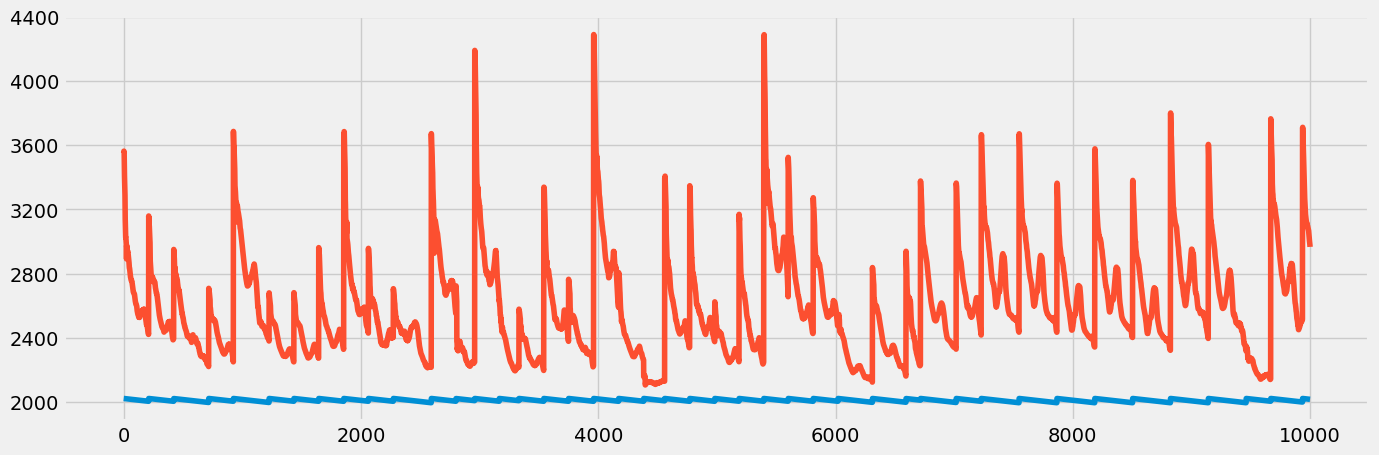

In [19]:
# Plot data using matplotlib
# At this point, the plot will only be done with dataframe before subsetting, wrangling, and cleaning;
# only the following variables will be plotted: 'date' and 'value'

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_region_indicators[['date', 'value']])

#### The plot above does not tell much even though the variables are stated. Another subset will be made to plot the data again, before and after proceeding with the cleaning and wrangling.

# 02 Subsetting, Wrangling, and Cleaning Time- Series Data

## 02.2 Subsetting

In [20]:
# Make subset with indicator ID 'ZSFH'

dri = data_region_indicators.loc[data_region_indicators['indicator_id']=='ZSFH']

In [21]:
# Verify 'dri'

dri.head()

,indicator_id,region_id,date,value,region_type,region,indicator,category
0,ZSFH,99999,2022-07-31,577097.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
1,ZSFH,99999,2022-06-30,580792.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
2,ZSFH,99999,2022-05-31,581718.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
3,ZSFH,99999,2022-04-30,580347.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values
4,ZSFH,99999,2022-03-31,579785.0,zip,98847; WA; Wenatchee; Chelan County; Peshastin,ZHVI Single-Family Homes Time Series ($),Home values


#### This data set only represents the "ZHVI Singe-Family Homes Time Series" indicator, from 31-01-1996 to 08-31-2022.

In [22]:
dri.shape

(10000, 8)

#### 'dri' dataframe has the exact same records as 'data_region_indicator' dataframe. All the variables will be droped except by 'date' and 'value'.

In [23]:
dri = dri.drop(columns = [ 'indicator_id', 'region_id', 'region_type', 'region', 'indicator', 'category'])

In [24]:
# Verify 'dri' dataframe only has 'date' and 'value'

dri.head()

,date,value
0,2022-07-31,577097.0
1,2022-06-30,580792.0
2,2022-05-31,581718.0
3,2022-04-30,580347.0
4,2022-03-31,579785.0


In [54]:
list(dri.date.unique())

[numpy.datetime64('2022-07-31T00:00:00.000000000'),
 numpy.datetime64('2022-06-30T00:00:00.000000000'),
 numpy.datetime64('2022-05-31T00:00:00.000000000'),
 numpy.datetime64('2022-04-30T00:00:00.000000000'),
 numpy.datetime64('2022-03-31T00:00:00.000000000'),
 numpy.datetime64('2022-02-28T00:00:00.000000000'),
 numpy.datetime64('2022-01-31T00:00:00.000000000'),
 numpy.datetime64('2021-12-31T00:00:00.000000000'),
 numpy.datetime64('2021-11-30T00:00:00.000000000'),
 numpy.datetime64('2021-10-31T00:00:00.000000000'),
 numpy.datetime64('2021-09-30T00:00:00.000000000'),
 numpy.datetime64('2021-08-31T00:00:00.000000000'),
 numpy.datetime64('2021-07-31T00:00:00.000000000'),
 numpy.datetime64('2021-06-30T00:00:00.000000000'),
 numpy.datetime64('2021-05-31T00:00:00.000000000'),
 numpy.datetime64('2021-04-30T00:00:00.000000000'),
 numpy.datetime64('2021-03-31T00:00:00.000000000'),
 numpy.datetime64('2021-02-28T00:00:00.000000000'),
 numpy.datetime64('2021-01-31T00:00:00.000000000'),
 numpy.datet

In [25]:
dri['date'].value_counts()

2018-09-30    43
2018-06-30    43
2019-09-30    43
2019-08-31    43
2019-07-31    43
              ..
1997-04-30     8
1997-05-31     8
1997-06-30     8
1996-01-31     8
2022-08-31     2
Name: date, Length: 320, dtype: int64

In [28]:
dri['date'].max()

Timestamp('2022-08-31 00:00:00')

In [29]:
dri['date'].min()

Timestamp('1996-01-31 00:00:00')

In [32]:
# In 'dri' dataframe, group 'date' variable by 'values' average
# Note: There are many dates repeated along the 'date' variable, so will average the values of those dates that
# are repeated more than once. Averaging these dates will produce an average for all of the regions in the United States,
# meaning, the produced average represents the United States.

data = dri.groupby('date').agg({'value': ['mean']})

In [33]:
# Verify 'data'

data.head()

,value
,mean
date,
1996-01-31,141962.00
1996-02-29,142601.25
1996-03-31,142902.50
1996-04-30,143683.00
1996-05-31,144764.75


In [34]:
data.shape

(320, 1)

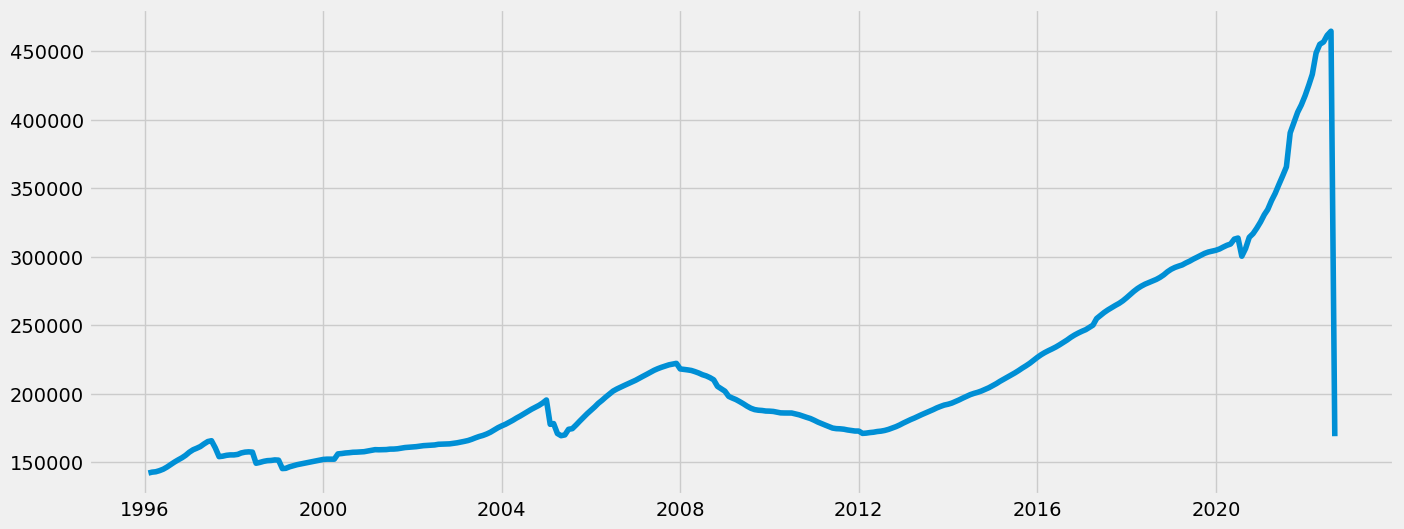

In [37]:
# Plot 'data' dataframe

plt.figure(figsize=(15, 6), dpi=100)

plt.plot(data)

#### This plot was made to verify the shape of data throughout time, but mainly to verify that the output can be properly interpreted. 


#### The values in the 'date' variable within the 'data' dataframe are the national averages of house prices in the United States from January 1996 to August 2022--with the exeption of a few months. Given the fact that this dataframe accurately represents the national average of house prices, but still is a small dataframe, this data frame will keep the values from 2022 (January to August).

In [39]:
# The date is already set as the index because of the way the subset has been grouped, nevertheless, the column
# will be changed to 'datetime'

# Reset the index in 'data' subset

data = data.reset_index()

In [40]:
data.head()

,date,value
,,mean
0,1996-01-31,141962.00
1,1996-02-29,142601.25
2,1996-03-31,142902.50
3,1996-04-30,143683.00
4,1996-05-31,144764.75


In [41]:
data.shape

(320, 2)

In [42]:
# Create a datetime columns from "date"

data['datetime'] = pd.to_datetime(data['date'])

In [43]:
data.head()

,date,value,datetime
,,mean,
0,1996-01-31,141962.00,1996-01-31
1,1996-02-29,142601.25,1996-02-29
2,1996-03-31,142902.50,1996-03-31
3,1996-04-30,143683.00,1996-04-30
4,1996-05-31,144764.75,1996-05-31


In [44]:
# Set the datetime as the index of the dataframe

data = data.set_index('datetime')

In [45]:
data.head()

,date,value
,,mean
datetime,,
1996-01-31,1996-01-31,141962.00
1996-02-29,1996-02-29,142601.25
1996-03-31,1996-03-31,142902.50
1996-04-30,1996-04-30,143683.00
1996-05-31,1996-05-31,144764.75


In [46]:
# Drop teh "Date" column

data.drop(['date'], axis=1, inplace=True)

In [47]:
data.head()

,value
,mean
datetime,
1996-01-31,141962.00
1996-02-29,142601.25
1996-03-31,142902.50
1996-04-30,143683.00
1996-05-31,144764.75


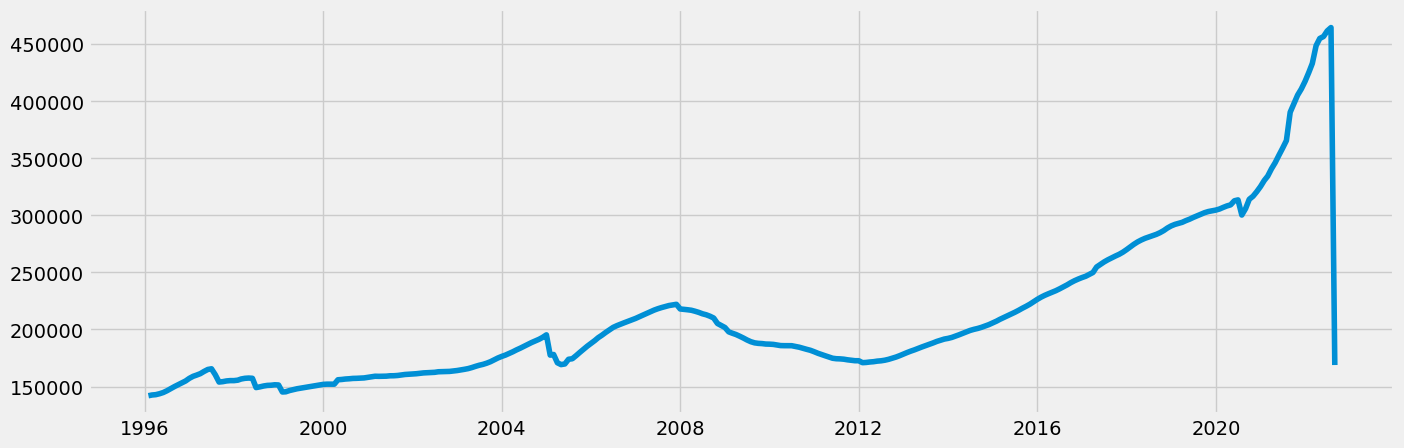

In [48]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### This plot is exactly the same as the one above (37), but as a way to corroborate the 'datetime' variable it was decided to plot 'data' subset again. 

In [49]:
data.isnull().sum()

value  mean    0
dtype: int64

In [50]:
data.duplicated().sum()


0

# 03 Time-Series Analysis: Decomposition

In [51]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [52]:
# Define th esize of special charts

rcParams['figure.figsize'] = 18, 7

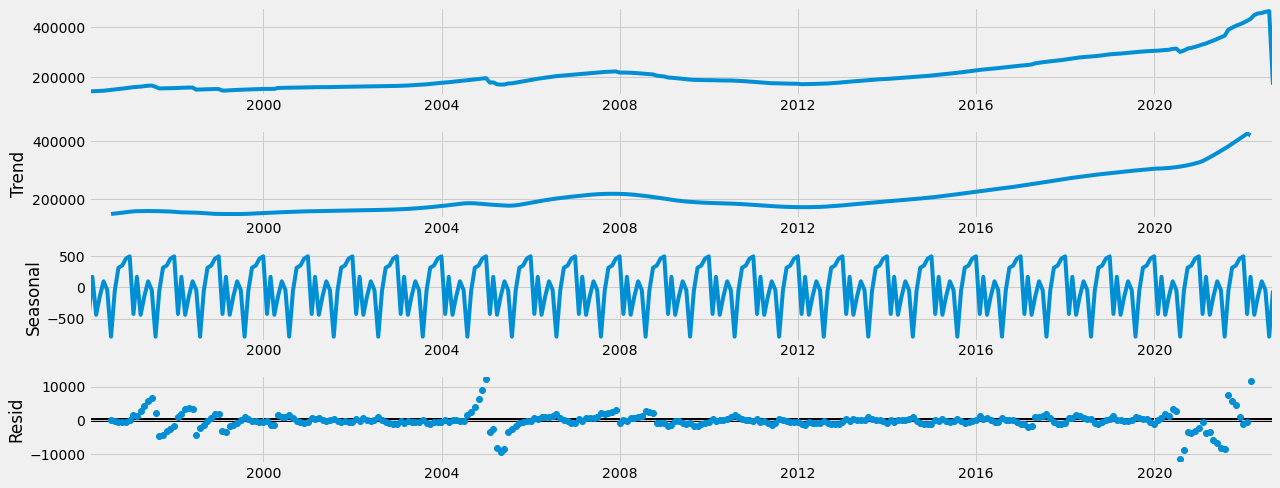

In [53]:
# Plot the separate components

decomposition.plot()
plt.show()

# 04 Testing for Stationarity

In [57]:
# Define Dickey Fuller Test function

def dickey_fuller(timeseries):
    
    # Perform the Dickey-Fuller test:
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.672479
p-value                          0.853750
Number of Lags Used             12.000000
Number of Observations Used    307.000000
Critical Value (1%)             -3.451831
Critical Value (5%)             -2.871001
Critical Value (10%)            -2.571811
dtype: float64


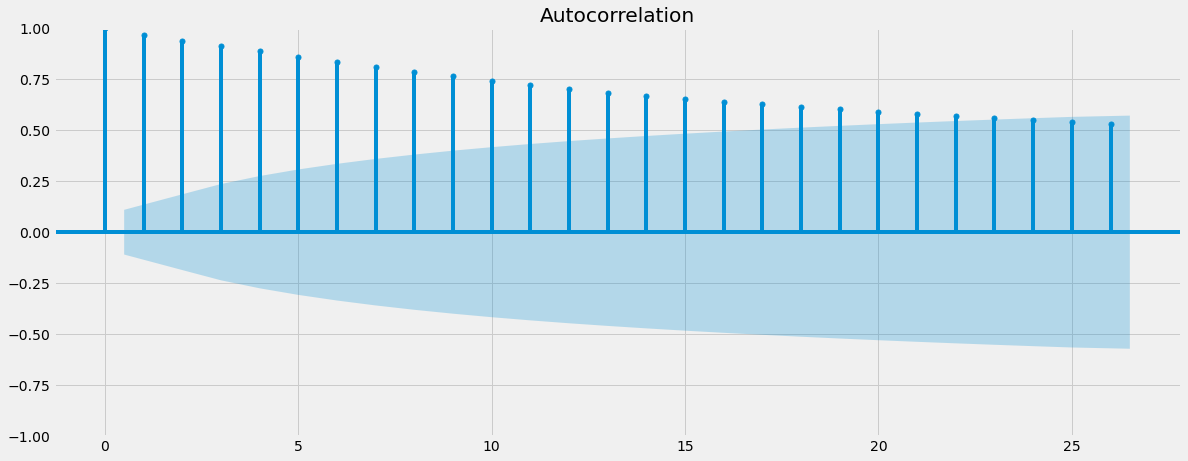

In [58]:
# Check out a plot of autocorrelations

plot_acf(data)
plt.show()

# 05 Stationarizing the "Zillow Real State - ZHVI Single-Family Homes Time Series" indicator

In [59]:
# Differencing values in 'data' and their lag
# t-(t-1)

data_diff = data - data.shift(1)

In [60]:
# Removing missing values from diferencing values from their lag.

data_diff.dropna(inplace = True)

In [61]:
data_diff.head()

,value
,mean
datetime,
1996-02-29,639.250
1996-03-31,301.250
1996-04-30,780.500
1996-05-31,1081.750
1996-06-30,1520.375


In [62]:
data_diff.shape

(319, 1)

#### Only one value was removed. 

In [63]:
data_diff.columns

MultiIndex([('value', 'mean')],
           )

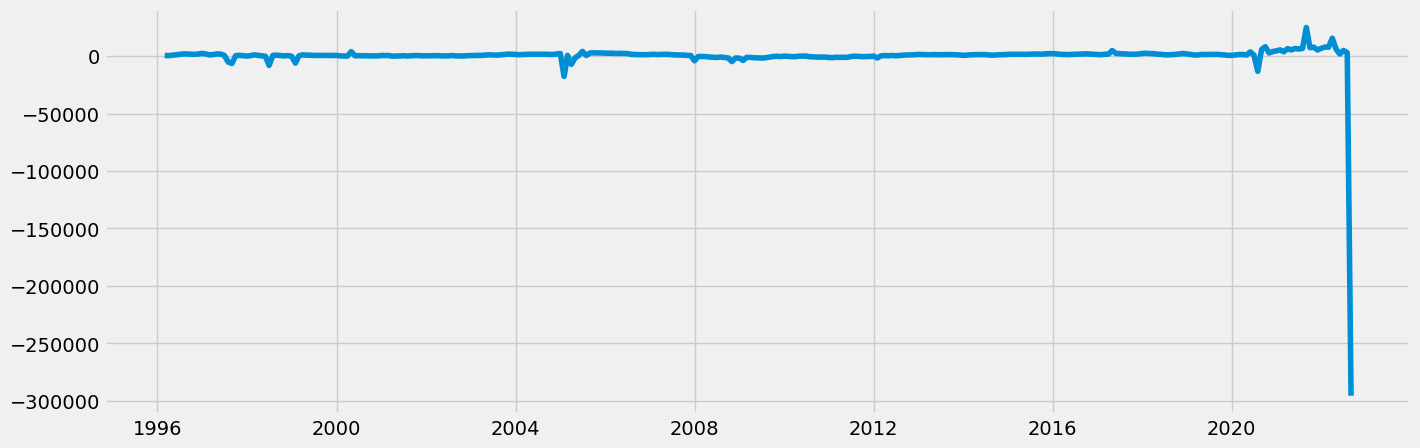

In [64]:
# Check changes in the curve after diferencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

#### 'data' subset will be reduce it's dates from January 1996 to December 2021

In [67]:
data_2 = data.reset_index()

In [68]:
data_2.head()

,datetime,value
,,mean
0,1996-01-31,141962.00
1,1996-02-29,142601.25
2,1996-03-31,142902.50
3,1996-04-30,143683.00
4,1996-05-31,144764.75


In [70]:
data_2.shape

(320, 2)

In [72]:
data_sub = data_2.loc[(data_2['datetime'] >= '1996-01-01') & (data_2['datetime'] < '2020-12-31')]

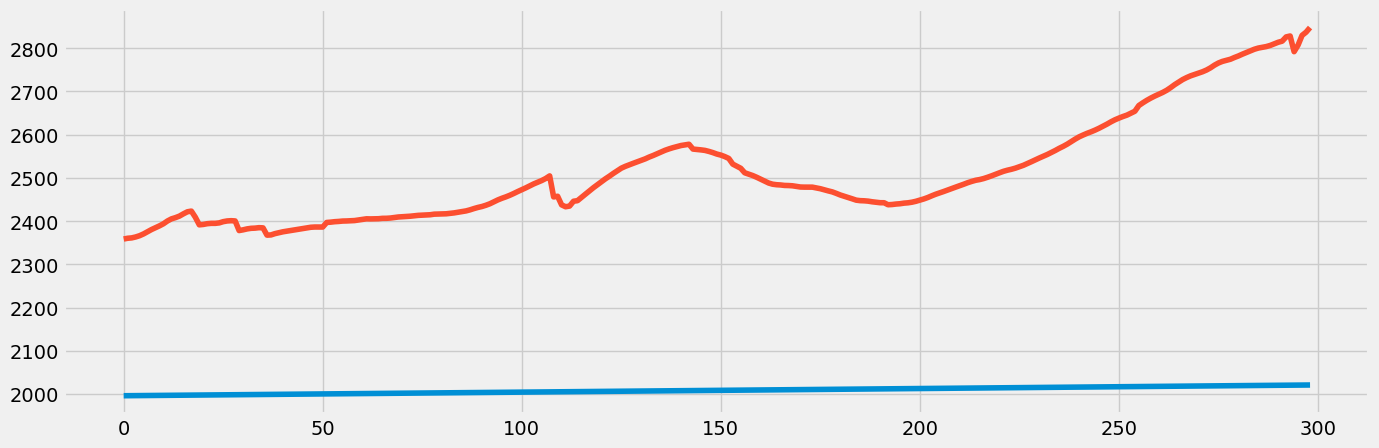

In [73]:
# Verify 'data_sub'

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [75]:
# Set the datetime as the index of the dataframe

data_sub = data_sub.set_index('datetime')

In [76]:
data_sub.head()


,value
,mean
datetime,
1996-01-31,141962.00
1996-02-29,142601.25
1996-03-31,142902.50
1996-04-30,143683.00
1996-05-31,144764.75


## 03.B Time-Series Analysis: Decomposition

In [87]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [88]:
# Define th esize of special charts

rcParams['figure.figsize'] = 18, 7

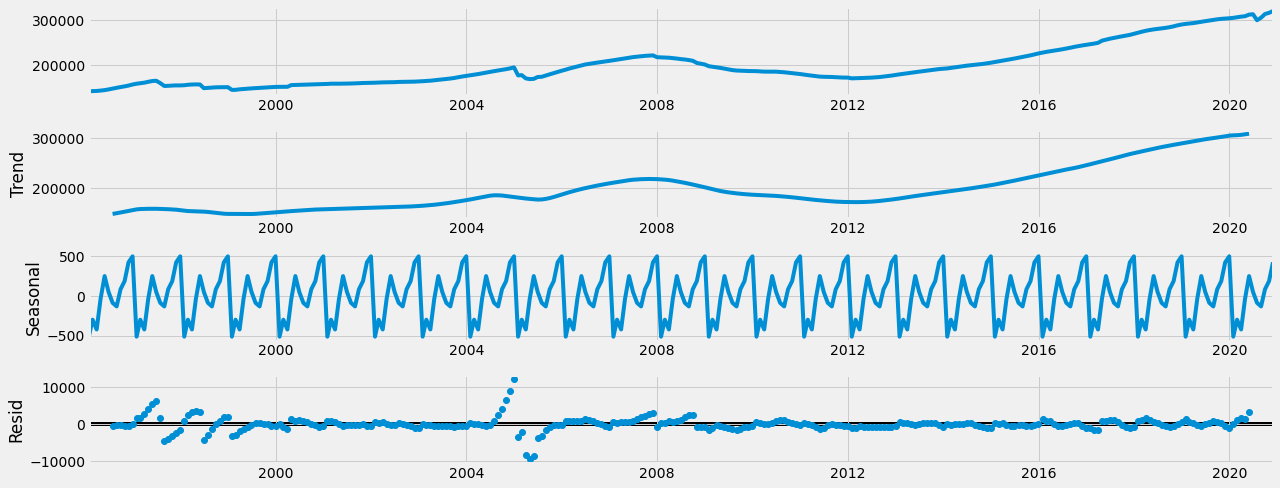

In [89]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Level & Trend: The level and Trend are pretty similar, but you can clearly see the noise between 2004 and 2005.

#### Level: The average house prices in the United States was pretty stable, but slowly increasing from 1999 up to late 2007 (right before the crisis) when the subprime mortgage market grew more than ever--home loans where easier to get by people with low credit scores, and the financial market strongly relied on the missleading fact that the housing market was "to big to fail". This lead to the longest recession seen since the WWII, which can be clearly seen in the trend line with a jump that's abruptly interrupted in in the eve of 2008, seeing the financial havoc until 2012 when the markets stabilize and starts to receover. 

#### Seasonality is pretty regular, which means that even though there are variations every year, the seasons are pretty much the same (shape).

#### Noise: In the Level you can see the noise from late 1996 to mid 1999; then, the most noise in 2004 (probably due to the activity pike that lead to the 2008 crisis, and finally that in between the crisis.

## 04.B Testing for stationarity for 'daata_sub' subset

#### Dickey Fuller test (hypotheses test).

#### Null hypothesis: There's a presences of a unit root--in other words, the presence of a pattern that's unpredicatbale.
#### Alternative hypothesis: There's no unpredicatble pattern (no unit root).

In [77]:
def dickey_fuller(timeseries):
    
    # Perform the Dickey-Fuller test:
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.677407
p-value                          0.998072
Number of Lags Used              3.000000
Number of Observations Used    295.000000
Critical Value (1%)             -3.452713
Critical Value (5%)             -2.871388
Critical Value (10%)            -2.572017
dtype: float64


#### The Test Statistic is larger than the Critical Value (5%), therefore, we the Null Hypothesis is rejected and the Alternative Hypothesis is validated: There is a unit root in the data.

#### p-value is not significant.

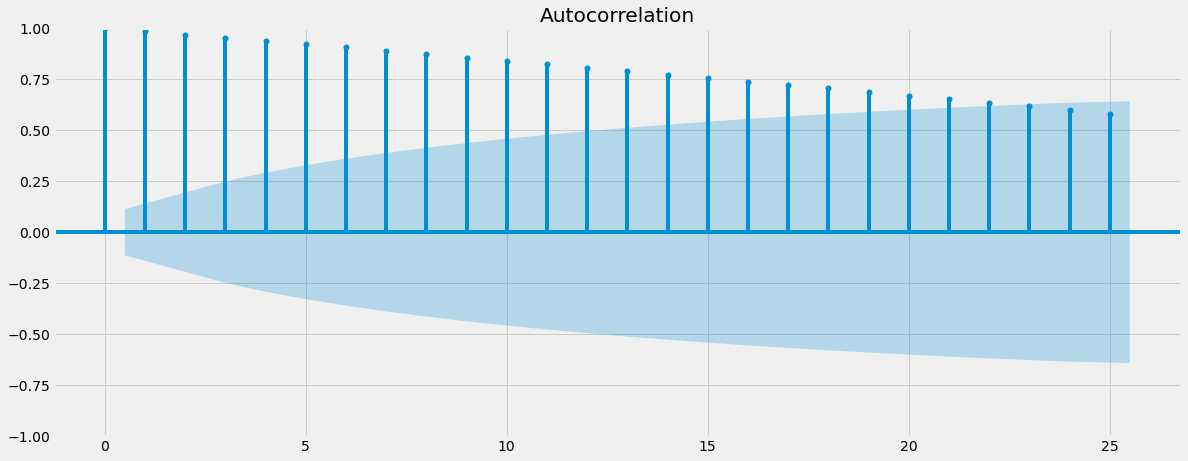

In [78]:
# Check out a plot of autocorrelations

plot_acf(data_sub)
plt.show()

#### There are several lags that are significant with each other

## 05.B Stationarizing the "Zillow Real State - ZHVI Single-Family Homes Time Series" indicator for 'data_sub' subset

In [79]:
# Differencing values in 'data' and their lag
# t-(t-1)

data_diff = data_sub - data_sub.shift(1)

In [80]:
# Removing missing values from diferencing values from their lag.

data_diff.dropna(inplace = True)

In [81]:
data_diff.head()

,value
,mean
datetime,
1996-02-29,639.250
1996-03-31,301.250
1996-04-30,780.500
1996-05-31,1081.750
1996-06-30,1520.375


In [82]:
data_diff.shape

(298, 1)

#### Two values substracted 

In [83]:
data_diff.columns

MultiIndex([('value', 'mean')],
           )

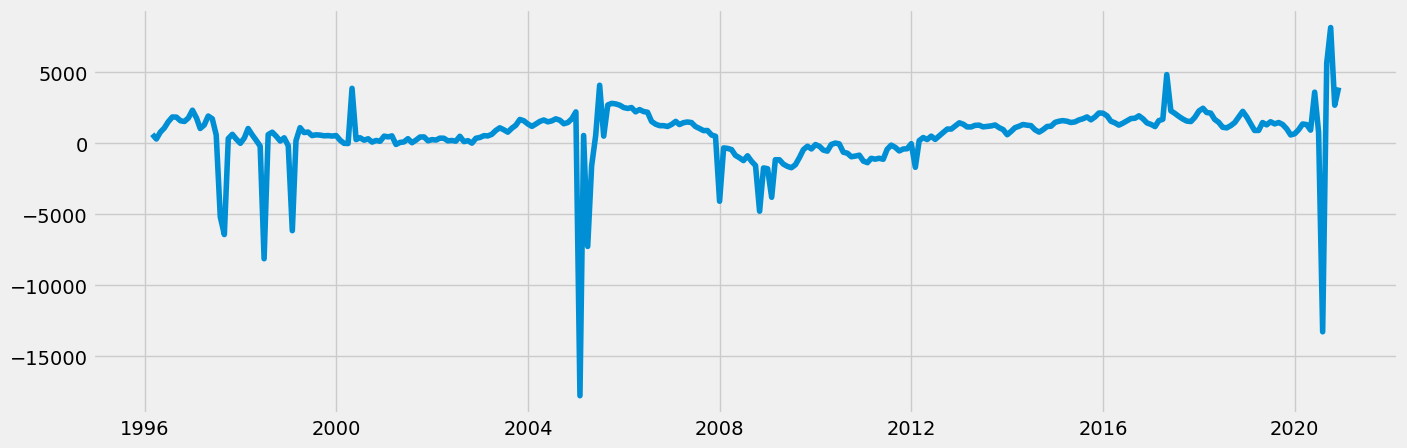

In [84]:
# Check changes in the curve after diferencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [85]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.587572e+00
p-value                        7.249730e-09
Number of Lags Used            2.000000e+00
Number of Observations Used    2.950000e+02
Critical Value (1%)           -3.452713e+00
Critical Value (5%)           -2.871388e+00
Critical Value (10%)          -2.572017e+00
dtype: float64


#### Test Statistic is smaller than the Critical Value (5%), which means that we can reject the Null Hypothesis: There's no unpredicatble patter or no unit root.

#### The p-value is a significant result as the given value represents 0.000000007249730%

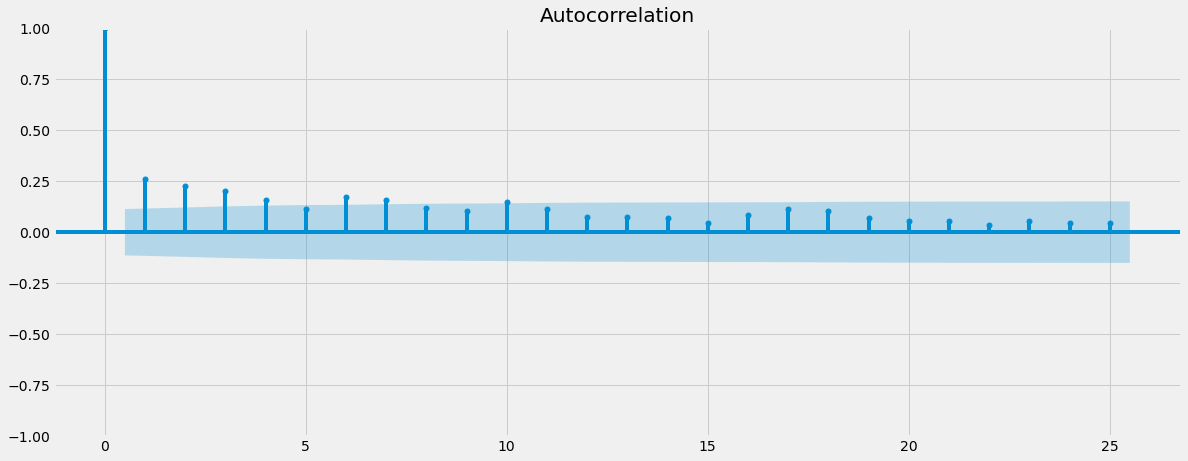

In [86]:
plot_acf(data_diff)
plt.show()

#### The lags are significantly less than before, and given the fact that the lags are less than 10 and pretty small, we can say the stationarity is medium to strong. 